## CS224 - Fall 2024
## PROGRAMMING ASSIGNMENT 1 - Principal Component Analysis (PCA) & K-means Clustering

### Due: November 5, 2024 @ 11:59pm PDT

**Submission Method**: Submit both the .ipynb and the PDF file on **Gradescope**. (For more details, see the Assignment Guidelines.)

**Maximum points**: 15

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: Aaryan Bhagat
  </br>

  <b>Student ID Number</b>:  862468325
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br>
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview
In this assignment, We will implement PCA, apply it to the [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, and observe how the reconstruction changes as we change the number of principal components used.

For this assignment we will use the functionality of [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

*   Before you start, make sure you have installed all those packages in your local Jupyter instance.
*   If you are asked to implement a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please just ASK**.
*   It's okay to use functions in `numpy.linalg` to calculate matrix decomposition (e.g., `la.eig()`, `la.svd()`), but using built-in functions like `sklearn.decomposition.PCA()` will **not** get you any points.


Please read **all** cells carefully and answer **all** parts (both text and missing code). You will need to complete all the code marked `YOUR CODE HERE` and answer descriptive/derivation questions.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

np.random.seed(42)
# DO NOT REMOVE THE CODE ABOVE

## Question 1 [8 points]

**Preliminaries**

The [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

First, Let's import the images and vectorize each image in the dataset.

In [3]:
# Data Preparation
mnist = load_digits()
data = mnist.data
# Display the shape of the data
print("Data shape:", data.shape)

Data shape: (1797, 64)


In [4]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

**(a) [1 point]**  Compute the mean and variance of the images and standardize the dataset.

In [5]:
# Step 1: Standardize the Data
def standardize(data):
    """
    Standardize the dataset.

    Parameters:
    data (numpy array): Original data array.

    Returns:
    standardized_data (numpy array): Data after standardization.
    """
    # TODO: Compute the mean and standard deviation of the data.
    mean = np.mean(data, axis=0)# YOUR CODE HERE
    std = np.std(data, axis=0) + 1e-10 # 1e-10 added to avoid division by zero error

    # TODO: Return the standardized data.
    standardized_data = (data - mean)/std# YOUR CODE HERE
    # print(mean, mean.shape)
    # print(std, std.shape)
    return standardized_data, mean, std

# Standardize the data and print the first 2 rows
data_standardized, mean, std = standardize(data)
print("Shape of data_standardized: ", data_standardized.shape)
print("Shape of mean vector: ", mean.shape)
# print(np.mean(data_standardized, axis=0))

Shape of data_standardized:  (1797, 64)
Shape of mean vector:  (64,)


**(b) [1 point]** Calculate the covariance matrix for the standardized dataset and calculate the eigenvalues and eigenvectors.

In [6]:
# Step 2: Calculate the covariance matrix for the features in the dataset.
def compute_covariance_matrix(data):
    """
    Compute the covariance matrix of the standardized data.

    Parameters:
    data (numpy array): Standardized data array.

    Returns:
    covariance_matrix (numpy array): Covariance matrix of the data.
    """
    covariance_matrix = np.cov(data, rowvar=False)# YOUR CODE HERE;
    covariance_matrix = data.T @ data / (data.shape[0]-1)# YOUR CODE HERE;
    # You can use the numpy function for this; however, if you write your own code to implement it and show that the result is similar to what numpy provides, you can get 1 extra point credit.
    return covariance_matrix

# Compute the covariance matrix
covariance_matrix = compute_covariance_matrix(data_standardized)
print("Shape of Covariance Matrix", covariance_matrix.shape)

Shape of Covariance Matrix (64, 64)


In [8]:
def compute_eigen(covariance_matrix):
    """
    Compute the eigenvalues and eigenvectors of the covariance matrix.

    Parameters:
    covariance_matrix (numpy array): Covariance matrix of the data.

    Returns:
    eigenvalues (numpy array): Eigenvalues in descending order.
    eigenvectors (numpy array): Corresponding eigenvectors.
    """

    # Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)# YOUR CODE HERE
    # print(eigenvalues.shape, eigenvectors.shape)
    # print(eigenvalues)

    # Step 4: Sort eigenvalues and their corresponding eigenvectors (in descending order.)
    sorted_indices = np.argsort(eigenvalues)[::-1]# YOUR CODE HERE
    print(sorted_indices)
    eigenvalues = np.array([eigenvalues[x] for x in sorted_indices]) # YOUR CODE HERE
    eigenvectors = np.array([eigenvectors[x] for x in sorted_indices]) # YOUR CODE HERE

    return eigenvalues, eigenvectors

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = compute_eigen(covariance_matrix)
print(eigenvalues)
print("Shape of Eigenvalues: ", eigenvalues.shape)
print("Shape of Eigenvectors:", eigenvectors.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 41 42 43 54 57 59 60 58 56
 55 53 52 51 50 49 48 47 46 45 44 40 39 61 62 63]
[7.34477606 5.83549054 5.15396118 3.96623597 2.96634519 2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784615 1.57287888
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368677 0.99977861
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.29406627 0.27692285 0.258273   0.24783029 0.2423566
 0.217582   0.20799593 0.2000909  0.18983516 0.17612894 0.16875236
 0.15818474 0.14311427 0.13321081 0.12426371 0.11932898 0.11188655
 0.10250434 0.09840876 0.09018543 0.08246812 0.07635394 0.06328961
 0.05037444 0.         0.         0.        ]
Shape of Eigenvalues:  (64,)
Shape of Eigenvectors: (64, 64)


**(c) [2 points]** Analyze the eigenvalues in $\Lambda$ and decide which eigenvalues to retain and which can be set to zero.

* You may want to plot the eigenvalues, the fraction of variance explained, AIC, or BIC to help decide on a threshold.
* Ensure your plots are clearly labeled with titles and axes labels, which is critical for understanding the visualized data.

[np.float64(0.12033916102799788), np.float64(0.09561054407310768), np.float64(0.08444414896481628), np.float64(0.06498407910328302), np.float64(0.04860154877407397), np.float64(0.0421411986817655), np.float64(0.03942082804878714), np.float64(0.033893809258550595), np.float64(0.029982210105541505), np.float64(0.029320025491050002), np.float64(0.027818054616369388), np.float64(0.025770550903578632), np.float64(0.02275303315257608), np.float64(0.02227179739008725), np.float64(0.021652294307054922), np.float64(0.019141666056889793), np.float64(0.017755470819274886), np.float64(0.016380692711222774), np.float64(0.01596460166718235), np.float64(0.014891911862815651), np.float64(0.013479695659518936), np.float64(0.012719313689514082), np.float64(0.011658373505845301), np.float64(0.010576465988423753), np.float64(0.009753159473041118), np.float64(0.009445589900584994), np.float64(0.008630138271091513), np.float64(0.008366428536460996), np.float64(0.007976932486972557), np.float64(0.00746471371

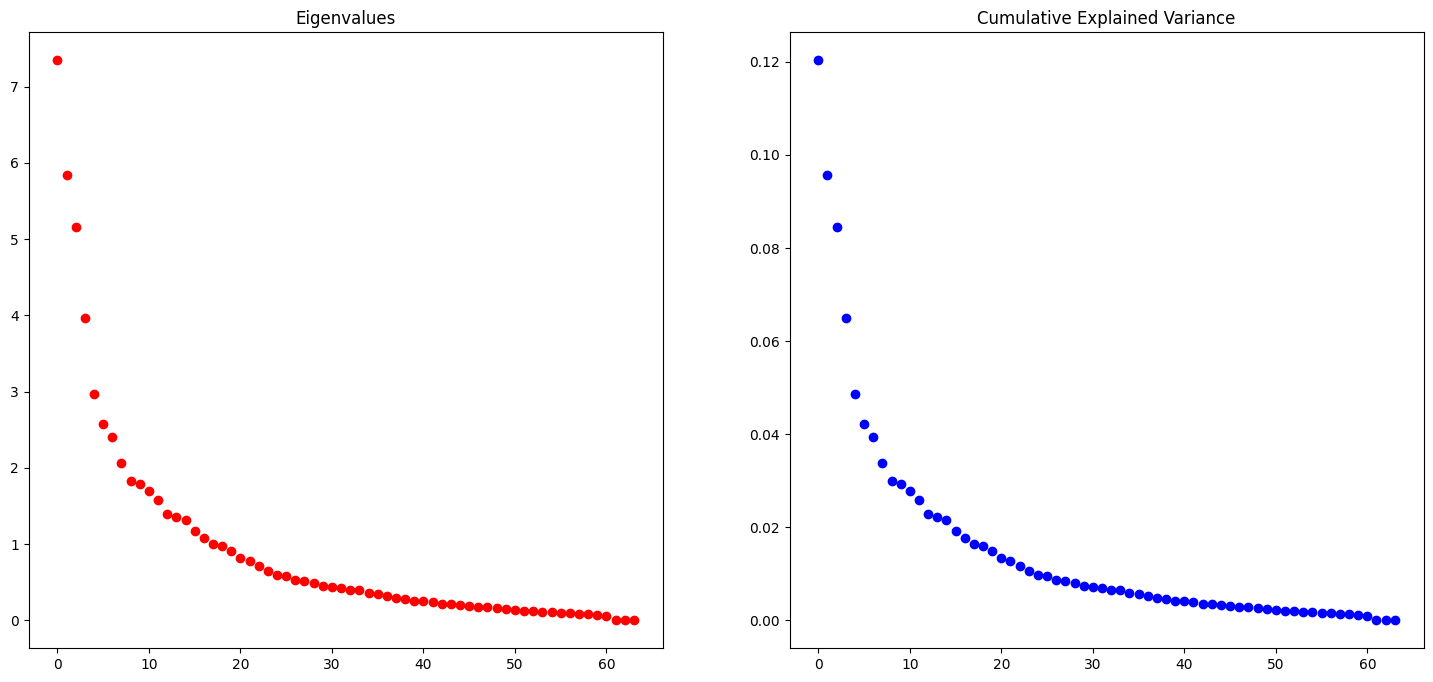

In [9]:
def draw(eigenvalues, eigenvectors):
    # TODO: Add your plotting code here
    # Example plots you may consider include:
    # - Plotting the eigenvalues
    # - Plotting the cumulative explained variance
    cumulative_variance = [x/np.sum(eigenvalues) for x in eigenvalues]
    print(cumulative_variance)
    figure, axis = plt.subplots(1, 2, figsize=(18, 8))
    axis[0].plot(eigenvalues, 'ro')
    axis[0].set_title("Eigenvalues")
    axis[1].plot(cumulative_variance, 'bo')
    axis[1].set_title("Cumulative Explained Variance")
    plt.show()
    # - Any additional analysis (AIC, BIC, etc.)

    # YOUR CODE HERE
    pass

draw(eigenvalues, eigenvectors)

**(d) [1 point]**  Reconstruct an approximation of each X after removing some of the small eigenvalues. (Display only a couple of the reconstructed **images**, and you will need to restore the reconstructed data to its original scale using the mean and standard deviation.)

In [9]:
# Step 5: Pick k eigenvalues and form a matrix of eigenvectors.
def find_optimal_k(eigenvalues, eigenvectors):
    """
    Analyze eigenvalues and decide which to retain.

    Parameters:
    eigenvalues (numpy array): Eigenvalues in descending order.
    eigenvectors (numpy array): Corresponding eigenvectors.

    Returns:
    n_components (int): Number of principal components to retain.
    """

    # TODO: Determine the number of components needed to reach the threshold.
    # YOUR CODE HERE
    # I will not use the last 3 eigen vectors who have cumulative eigen value equals 0
    n_components = 61 # YOUR CODE HERE
    return n_components

def choose_principal_components(n_components, eigenvectors):
    """
    Choose the principal components based on the number selected.

    Parameters:
    n_components (int): Number of components to retain.
    eigenvectors (numpy array): The original eigenvectors.

    Returns:
    selected_eigenvectors (numpy array): Eigenvectors corresponding to the top k components.
    """
    selected_eigenvectors = eigenvectors[:, :n_components]# YOUR CODE HERE
    return selected_eigenvectors

n_components = find_optimal_k(eigenvalues, eigenvectors)
selected_eigenvectors = choose_principal_components(n_components, eigenvectors)
print(f"Selected {n_components} eigenvectors.")
print(f"Shape of selected eigenvectors: {selected_eigenvectors.shape}")

Selected 61 eigenvectors.
Shape of selected eigenvectors: (64, 61)


Shape of reconstructed data: (1797, 64)


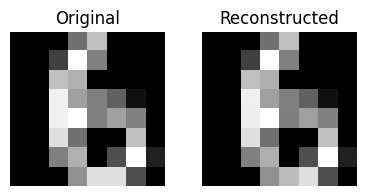

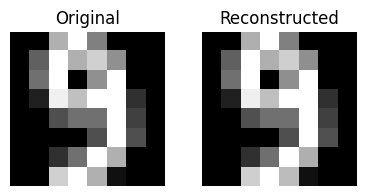

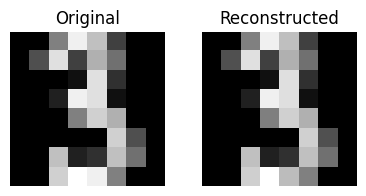

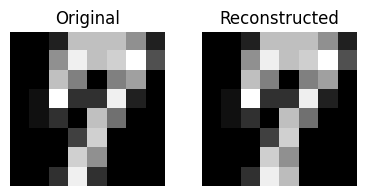

In [11]:
# Step 6: Reconstruct Data from Principal Components
def reconstruct_data(data_standardized, selected_eigenvectors):
    """
    Reconstruct the original data using selected eigenvectors.

    Parameters:
    data_standardized (numpy array): The standardized data matrix.
    selected_eigenvectors (numpy array): Eigenvectors corresponding to the top k components.

    Returns:
    data_reconstructed (numpy array): Reconstructed approximation of the original data.
    """
    # Project the original data onto the selected principal components
    data_projected = data_standardized @ selected_eigenvectors# YOUR CODE HERE

    # Reconstruct the data by projecting back into the original space
    data_reconstructed = data_projected @ selected_eigenvectors.T# YOUR CODE HERE

    return data_reconstructed

def restore_original_scale(X_reconstructed, mean_vector, std_vector):
    """
    Restore the reconstructed data to its original scale using the mean and standard deviation.

    Parameters:
    X_reconstructed (numpy array): Reconstructed data (standardized scale).
    mean_vector (numpy array): Mean vector used during standardization.
    std_vector (numpy array): Standard deviation vector used during standardization.

    Returns:
    X_restored (numpy array): Reconstructed data in its original scale.
    """
    X_restored = X_reconstructed * std + mean# YOUR CODE HERE

    return X_restored

def display_reconstruct_data(data_standardized, data_reconstructed, num_examples=4):
    image_shape = (8, 8)
    random_indices = np.random.choice(data_standardized.shape[0], size=num_examples, replace=False)

    for idx in random_indices:
        plt.figure(figsize=(4, 2))

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(data_standardized[idx].reshape(image_shape), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed image
        plt.subplot(1, 2, 2)
        plt.imshow(data_reconstructed[idx].reshape(image_shape), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

        plt.tight_layout()
        plt.show()


# Transform the data using the selected components
data_reconstructed = reconstruct_data(data_standardized, selected_eigenvectors)
print("Shape of reconstructed data:", data_reconstructed.shape)

display_reconstruct_data(restore_original_scale(data_standardized, mean, std),
                         restore_original_scale(data_reconstructed, mean, std))

**(e) [2 points]**  Compute the error between the reconstructed X and original image. (The mean of the original data should **not** be included in the error.)

In [12]:
def compute_reconstruction_error(data_standardized, data_reconstructed):
    """
    Compute the mean squared error (MSE) between the standardized original data
    and the reconstructed data.

    Parameters:
    data_standardized (numpy array): The standardized original data matrix.
    data_reconstructed (numpy array): Reconstructed approximation of the standardized data.

    Returns:
    error (float): Mean squared error between original and reconstructed data.
    """
    # TODO: Calculate the MSE between the standardized original data and reconstructed data
    error = (np.square(data_reconstructed - data_standardized)).mean(axis=0)# YOUR CODE HERE
    error = np.linalg.norm(error)/error.shape[0]

    return error

reconstruction_error = compute_reconstruction_error(data_standardized, data_reconstructed)
with np.printoptions(precision=3):
    print(f"Reconstruction error (MSE): {reconstruction_error}")

Reconstruction error (MSE): 0.01562499999936636


**(f) [1 points]**  Analyze by choosing different numbers of eigenvalues to be zeroed out. Provide a short summary of your conclusions based on this analysis.

In [14]:
# TODO: YOUR CODE HERE
for i in range(data.shape[1]+1):
    trial_selected_eigenvectors = choose_principal_components(i, eigenvectors)
    print(f"Selected {i} eigenvectors.")
    print(f"Shape of selected eigenvectors: {trial_selected_eigenvectors.shape}")
    trial_data_reconstructed = reconstruct_data(data_standardized, trial_selected_eigenvectors)
    trial_reconstruction_error = compute_reconstruction_error(data_standardized, trial_data_reconstructed)
    with np.printoptions(precision=3):
        print(f"Reconstruction error (MSE) for number of components {i}: {trial_reconstruction_error}")

Selected 0 eigenvectors.
Shape of selected eigenvectors: (64, 0)
Reconstruction error (MSE) for number of components 0: 0.12203515112460833
Selected 1 eigenvectors.
Shape of selected eigenvectors: (64, 1)
Reconstruction error (MSE) for number of components 1: 0.1165027033862443
Selected 2 eigenvectors.
Shape of selected eigenvectors: (64, 2)
Reconstruction error (MSE) for number of components 2: 0.11027365413459407
Selected 3 eigenvectors.
Shape of selected eigenvectors: (64, 3)
Reconstruction error (MSE) for number of components 3: 0.10569112328755628
Selected 4 eigenvectors.
Shape of selected eigenvectors: (64, 4)
Reconstruction error (MSE) for number of components 4: 0.10186565146095734
Selected 5 eigenvectors.
Shape of selected eigenvectors: (64, 5)
Reconstruction error (MSE) for number of components 5: 0.09812172169831605
Selected 6 eigenvectors.
Shape of selected eigenvectors: (64, 6)
Reconstruction error (MSE) for number of components 6: 0.09496933177724225
Selected 7 eigenvecto

After displaying the reconstructed error, it is clear that as we intake more n_components the reconstruction is more accurate to the original.

[TODO: YOUR SUMMARY HERE]

## Question 2 [7 points]
After implementing PCA, use k-means clustering on the PCA-transformed data.
* To enable effective visualization in a 2D space, we choose the first 2 components of your PCA-transformed data for further (visual) analysis.



In [15]:
def transform_data_with_pca(data_standardized, eigenvectors, n_components):
    X = data_standardized @ choose_principal_components(n_components, eigenvectors)
    return X

X = transform_data_with_pca(data_standardized, eigenvectors, n_components=2)
print("Shape of X: ", X.shape)

true_labels = mnist.target
print("Shape of true_labels: ", true_labels.shape)

Shape of X:  (1797, 2)
Shape of true_labels:  (1797,)


**(a)[3 points]** Implement k-means from scratch. Please refrain from using libraries like `scikit-learn` for the k-means functionality.

In [16]:
# Apply K-means Clustering to PCA-transformed Data
def k_means(X, k, max_iter=300):
    """
    Implement K-means clustering from scratch.

    Parameters:
    X (numpy array): Data to be clustered (n_samples, n_features).
    k (int): Number of clusters.
    max_iter (int): Maximum number of iterations for convergence.

    Returns:
    cluster_labels (numpy array): Cluster labels for each data point.
    centroids (numpy array): Coordinates of the cluster centers.
    """
    np.random.seed(0)  # For reproducibility
    # Randomly initialize the centroids by selecting k random samples from X
    centroids = X[np.random.choice(X.shape[0], size=k, replace=False)]# YOUR CODE HERE
    # print('centroid shape', centroids.shape)

    for iteration in range(max_iter):
        # Assign each data point to the nearest centroid
        # YOUR CODE HERE
        labels = []# YOUR CODE HERE
        for vec in np.array(X):
            distances = []
            for i in range(k):
                distances.append(np.linalg.norm(vec - centroids[i]))
            labels.append(np.argmin(distances))
        # Calculate new centroids as the mean of assigned points
        # print(X.shape)
        labels = np.array(labels)
        # print('labels shape ', labels.shape)
        new_centroids = np.empty((k, X.shape[1]))# YOUR CODE HERE
        # print(new_centroids.shape)
        for i in range(k):
            points = X[labels == i]
            # print(points.shape)
            new_centroids[i] = np.mean(points, axis=0)

        # Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids


k = 10 # Number of clusters (digits 0-9)
cluster_labels, centroids = k_means(X, k)
print("Shape of centroids: ", centroids.shape)

Shape of centroids:  (10, 2)


Plot the clustering results on the PCA-reduced data using different colors for each cluster(digit).

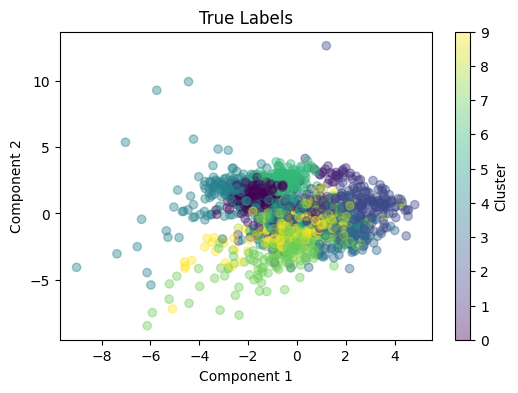

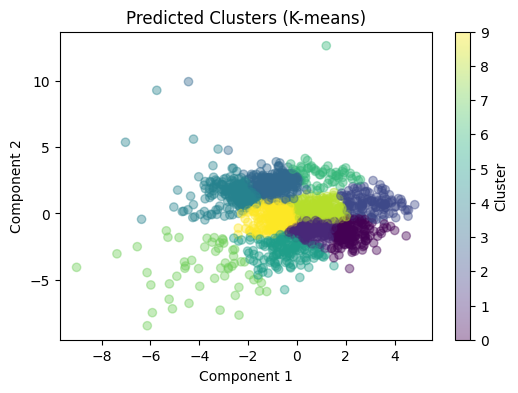

In [17]:
# Visualize Clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.4)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(label='Cluster')
    plt.show()


# Plot the ground truth clusters
plot_clusters(X, true_labels, "True Labels")
# Plot the predicted clusters on PCA-transformed data
plot_clusters(X, cluster_labels, "Predicted Clusters (K-means)")

After applying k-means on the PCA-reduced data, let's evaluate how well the clustering algorithm performed by checking the accuracy for each digit.

**(b)[3 points]** Analyze the accuracy of clustering for each digit.

In [18]:
from collections import Counter
def analyze_clustering_accuracy(true_labels, cluster_labels, num_clusters):
    """
    Analyze the accuracy of clustering for each digit based on true labels.

    Parameters:
    - true_labels: array-like, shape (n_samples,)
        The true labels of the samples (0-9 for digits).
    - cluster_labels: array-like, shape (n_samples,)
        The predicted cluster labels from k-means.
    - num_clusters: int
        The number of clusters (should match the number of unique digits, usually 10).

    Returns:
    - accuracy_per_digit: dict
        A dictionary mapping each digit to its accuracy.
    - total_accuracy: float
        The overall accuracy of the clustering.
    - cluster_to_digit: dict
        A dictionary mapping each cluster to the assigned digit class.
    """

    # Initialize accuracy dictionary for digits 0-9
    accuracy_per_digit = {digit: 0.0 for digit in range(10)}

    # Initialize total correct predictions
    total_correct_predictions = 0
    total_samples = len(true_labels)

    # Create a mapping from cluster to digit
    cluster_to_digit = {}

    # Count correct predictions for each cluster
    for cluster in range(num_clusters):
        cluster_mask = (cluster_labels == cluster)  # Mask for the current cluster
        if np.any(cluster_mask):  # Only proceed if the cluster has members
            predicted_labels = true_labels[cluster_mask]  # True labels for this cluster
            # TODO: Find the most common true label in this cluster
            # value, counts = np.unique(predicted_labels, return_counts=True)
            most_common_label = Counter(predicted_labels).most_common(1)[0][0]# YOUR CODE HERE
            cluster_to_digit[cluster] = most_common_label  # Map the cluster to the most common label

            # Update total correct predictions
            total_correct_predictions += np.sum(predicted_labels == most_common_label)  # Count correct predictions

            # Accumulate accuracy for the most common label
            accuracy_per_digit[most_common_label] += np.sum(predicted_labels == most_common_label)

    # Normalize the accuracy by the number of instances for each digit
    for digit in range(10):
        total_count = np.sum(true_labels == digit)
        if total_count > 0:
            accuracy_per_digit[digit] /= total_count

    # Calculate total accuracy
    total_accuracy = total_correct_predictions / total_samples if total_samples > 0 else 0.0

    # Assign new predicted labels based on the cluster-to-digit mapping
    final_predicted_labels = np.vectorize(cluster_to_digit.get)(cluster_labels)

    return accuracy_per_digit, total_accuracy, cluster_to_digit, final_predicted_labels

# TODO: Try changing this value to see how it affects the clustering
n_components = 12 # YOUR CODE HERE

X = transform_data_with_pca(data_standardized, eigenvectors, n_components=n_components)

cluster_labels, centroids = k_means(X, k)
accuracy_per_digit, total_accuracy, cluster_to_digit, final_predicted_labels = analyze_clustering_accuracy(true_labels, cluster_labels, num_clusters=k)

print("n_components: ", n_components)
print("Shape of X: ", X.shape)
[print(f"Digit {digit}: {accuracy:.4f}") for digit, accuracy in accuracy_per_digit.items()]


n_components:  12
Shape of X:  (1797, 12)
Digit 0: 0.9888
Digit 1: 0.6429
Digit 2: 0.8305
Digit 3: 0.7268
Digit 4: 0.0000
Digit 5: 0.9286
Digit 6: 0.9448
Digit 7: 0.7709
Digit 8: 0.0000
Digit 9: 0.0000


[None, None, None, None, None, None, None, None, None, None]

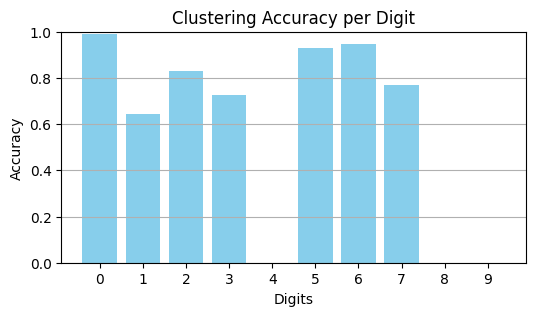

In [19]:
def plot_accuracy_per_digit(accuracy_per_digit):
    """
    Plot a bar chart for the accuracy of each digit.

    Parameters:
    - accuracy_per_digit: dict
        A dictionary mapping each digit to its accuracy.
    """
    digits = list(accuracy_per_digit.keys())
    accuracies = list(accuracy_per_digit.values())

    plt.figure(figsize=(6, 3))
    plt.bar(digits, accuracies, color='skyblue')
    plt.xlabel('Digits')
    plt.ylabel('Accuracy')
    plt.title('Clustering Accuracy per Digit')
    plt.xticks(digits)  # Ensure each digit is shown on the x-axis
    plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
    plt.grid(axis='y')  # Add grid lines for better readability
    plt.show()

plot_accuracy_per_digit(accuracy_per_digit)

**(c)[1 point]** Provide a short summary of your observations based on this analysis.

- Better to use some standard library for AIC or BIC instead of implementing manually.
- For matrix multiplication its good to use numpy operations and numpy data formats to store matrices as they are both space and efficiency optimized.
- The larger size of MNIST dataset (60,000 images) can get a better dimensionality reduction of PCA.
- Identifying image 0 was the most easiest for a large variation of the principal components used.
- Instead of K means we can also use another clustering algorithm to evaluate PCA.
- PCA visualization can get a little messy especially when we have used a large value of n_components but we are only using the top 2 for visualizing.
- More images for specific digits such as 4 can improve the PCA dimensionality reduction as well as accuracy in K-means